# Single Image Analysis

In [2]:
import os
import json
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
def clean_list(lst):
    new_lst = []
    for i in lst:
        if i is None:
            new_lst.append(0.0)
        else:
            new_lst.append(i)
    return new_lst

def apply_averaging_window(lst):
    averaged_lst = []
    for i in range(len(lst) - 2):
        window = lst[i:i+3]  # Extract a window of 3 elements
        if None in window:
            averaged_lst.append(0.0)  # Append None if any element in the window is None
        else:
            average = sum(window) / len(window)  # Calculate the average
            averaged_lst.append(average)
    return averaged_lst

In [4]:
def plot_scores_distribution(sample_name):
    # Base directory
    base_dir = '/Path/To/Base/Simulation/Data/'

    # Build paths to the selected sample
    json_path  = os.path.join(base_dir, sample_name, f'{sample_name}.json')
    img_path   = os.path.join(base_dir, sample_name, f'{sample_name}_center_0.jpg')

    # Read json file
    with open(json_path, 'r') as json_file:
        data = json.load(json_file)
    
    # Construct lists
    vertical_scores   = data['left_verification_confidence'][::-1] + data['center_verification_confidence'] + data['right_verification_confidence']
    horizontal_scores = data['down_verification_confidence'][::-1] + data['center_verification_confidence'] + data['up_verification_confidence']

    # Clean and avg the lists
    list_1     = clean_list(vertical_scores)
    list_1_avg = apply_averaging_window(list_1)
    list_1_dev = np.gradient(list_1_avg)
    list_1_dev_dev = np.gradient(list_1_dev)

    list_2     = clean_list(horizontal_scores)
    list_2_avg = apply_averaging_window(list_2)
    list_2_dev = np.gradient(list_2_avg)
    list_2_dev_dev = np.gradient(list_2_dev)

    min_1st_dev = min([min(list_1_dev), min(list_2_dev)])
    max_1st_dev = max([max(list_1_dev), max(list_2_dev)])

    min_2nd_dev = min([min(list_1_dev_dev), min(list_2_dev_dev)])
    max_2nd_dev = max([max(list_1_dev_dev), max(list_2_dev_dev)])

    print('len', len(list_1))
    print(list_1)
    # Plotting
    fig = plt.figure(layout="constrained",
                     figsize=(16, 9))  # (width, height)
    subfigs = fig.subfigures(1, 3, wspace=0.07, width_ratios=[1., 2., 2.])

    # Image Cells
    axs0 = subfigs[0].subplots(1,1)

    # Read and plot the image
    # Load the image
    image = np.asarray(Image.open(img_path))

    # Plot the RGB image
    axs0.imshow(image)
    axs0.set_title('Initial Drone Image')
    axs0.set_xticks([])
    axs0.set_yticks([])

    # Score Distributions Cells
    axs1 = subfigs[1].subplots(3, 1)
    axs1[0].plot(range(len(list_1)), list_1, marker='o', label='raw verification')
    axs1[0].fill_between(range(len(list_1)), list_1, color='lightblue')
    axs1[0].plot([num+1 for num in range(len(list_1_avg))], list_1_avg, marker='o', color='orange', label='average verification')
    axs1[0].text(0.01, -0.15, 'Left', transform=axs1[0].transAxes, ha='left')
    axs1[0].text(0.5, -0.15, 'Center', transform=axs1[0].transAxes, ha='center')
    axs1[0].text(0.99, -0.15, 'Right', transform=axs1[0].transAxes, ha='right')
    axs1[0].set_ylim(0.0, 1.0)
    axs1[0].set_xlim(0, len(list_1)-1)
    axs1[0].grid(True)
    axs1[0].set_ylabel('Verification Score (%)')
    axs1[0].set_title(f'Horizontal Verification Scores')
    axs1[0].legend()

    axs1[1].plot([num+1 for num in range(len(list_1_dev))], list_1_dev, marker='o', color='red', label='1st degree gradient')
    axs1[1].axhline(y=0, linestyle='dotted', color='black')
    axs1[1].text(0.01, -0.15, 'Left', transform=axs1[1].transAxes, ha='left')
    axs1[1].text(0.5, -0.15, 'Center', transform=axs1[1].transAxes, ha='center')
    axs1[1].text(0.99, -0.15, 'Right', transform=axs1[1].transAxes, ha='right')
    axs1[1].set_xlim(0, len(list_1)-1)
    # axs1[1].set_ylim(min_1st_dev, max_1st_dev)
    axs1[1].grid(True)
    axs1[1].set_ylabel('Gradient')
    axs1[1].set_title(f'Horizontal Gradient Curves')
    axs1[1].legend()

    axs1[2].plot([num+1 for num in range(len(list_1_dev_dev))], list_1_dev_dev, marker='o', color='red', label='2nd degree gradient')
    axs1[2].axhline(y=0, linestyle='dotted', color='black')
    axs1[2].text(0.01, -0.15, 'Left', transform=axs1[2].transAxes, ha='left')
    axs1[2].text(0.5, -0.15, 'Center', transform=axs1[2].transAxes, ha='center')
    axs1[2].text(0.99, -0.15, 'Right', transform=axs1[2].transAxes, ha='right')
    axs1[2].set_xlim(0, len(list_1)-1)
    # axs1[2].set_ylim(min_2nd_dev, max_2nd_dev)
    axs1[2].grid(True)
    axs1[2].set_ylabel('Gradient')
    axs1[2].legend()


    # Derivative
    axs2 = subfigs[2].subplots(3, 1)
    axs2[0].plot(range(len(list_2)), list_2, marker='o', label='raw verification')
    axs2[0].fill_between(range(len(list_2)), list_2, color='lightblue')
    axs2[0].plot([num+1 for num in range(len(list_2_avg))], list_2_avg, marker='o', color='orange', label='average verification')
    axs2[0].text(0.01, -0.15, 'Down', transform=axs2[0].transAxes, ha='left')
    axs2[0].text(0.5, -0.15, 'Center', transform=axs2[0].transAxes, ha='center')
    axs2[0].text(0.99, -0.15, 'Up', transform=axs2[0].transAxes, ha='right')
    axs2[0].set_ylim(0.0, 1.0)
    axs2[0].set_xlim(0, len(list_2)-1)
    axs2[0].grid(True)
    axs2[0].set_ylabel('Verification Score (%)')
    axs2[0].set_title(f'Vertical Verification Scores')
    axs2[0].legend()

    axs2[1].plot([num+1 for num in range(len(list_2_dev))], list_2_dev, marker='o', color='red', label='1st degree gradient')
    axs2[1].axhline(y=0, linestyle='dotted', color='black')
    axs2[1].text(0.01, -0.15, 'Down', transform=axs2[1].transAxes, ha='left')
    axs2[1].text(0.5, -0.15, 'Center', transform=axs2[1].transAxes, ha='center')
    axs2[1].text(0.99, -0.15, 'Up', transform=axs2[1].transAxes, ha='right')
    axs2[1].set_xlim(0, len(list_2)-1)
    # axs2[1].set_ylim(min_1st_dev, max_1st_dev)
    axs2[1].grid(True)
    axs2[1].set_ylabel('Gradient')
    axs2[1].set_title(f'Vertical Gradient Curves')
    axs2[1].legend()

    axs2[2].plot([num+1 for num in range(len(list_2_dev_dev))], list_2_dev_dev, marker='o', color='red', label='2nd degree gradient')
    axs2[2].axhline(y=0, linestyle='dotted', color='black')
    axs2[2].text(0.01, -0.15, 'Left', transform=axs2[2].transAxes, ha='left')
    axs2[2].text(0.5, -0.15, 'Center', transform=axs2[2].transAxes, ha='center')
    axs2[2].text(0.99, -0.15, 'Right', transform=axs2[2].transAxes, ha='right')
    axs2[2].set_xlim(0, len(list_1)-1)
    # axs2[2].set_ylim(min_2nd_dev, max_2nd_dev)
    axs2[2].grid(True)
    axs2[2].set_ylabel('Gradient')
    axs2[2].legend()

    plt.show()

len 31
[0.9274989492014835, 0.9234704474205913, 0.9257431640798747, 0.9223437688128668, 0.9245285082925186, 0.895045088852948, 0.8576434035050242, 0.8534750600575436, 0.8009965004708604, 0.7244462551858262, 0.5314794996006769, 0.2513042229872484, 0.07250684282557696, 0.10524827748657728, 0.03286208025357029, 0.018032927262155662, 0.10099033402045254, 0.08299542631697565, 0.12029374466251275, 0.12796561051959454, 0.08833156230478645, 0.08146819605035827, 0.11665028406058253, 0.16276043725882472, 0.27630540330400355, 0.2783593262738062, 0.4411593024064655, 0.6658397589617895, 0.7441832835857685, 0.8676569355644195, 0.9001433009560774]


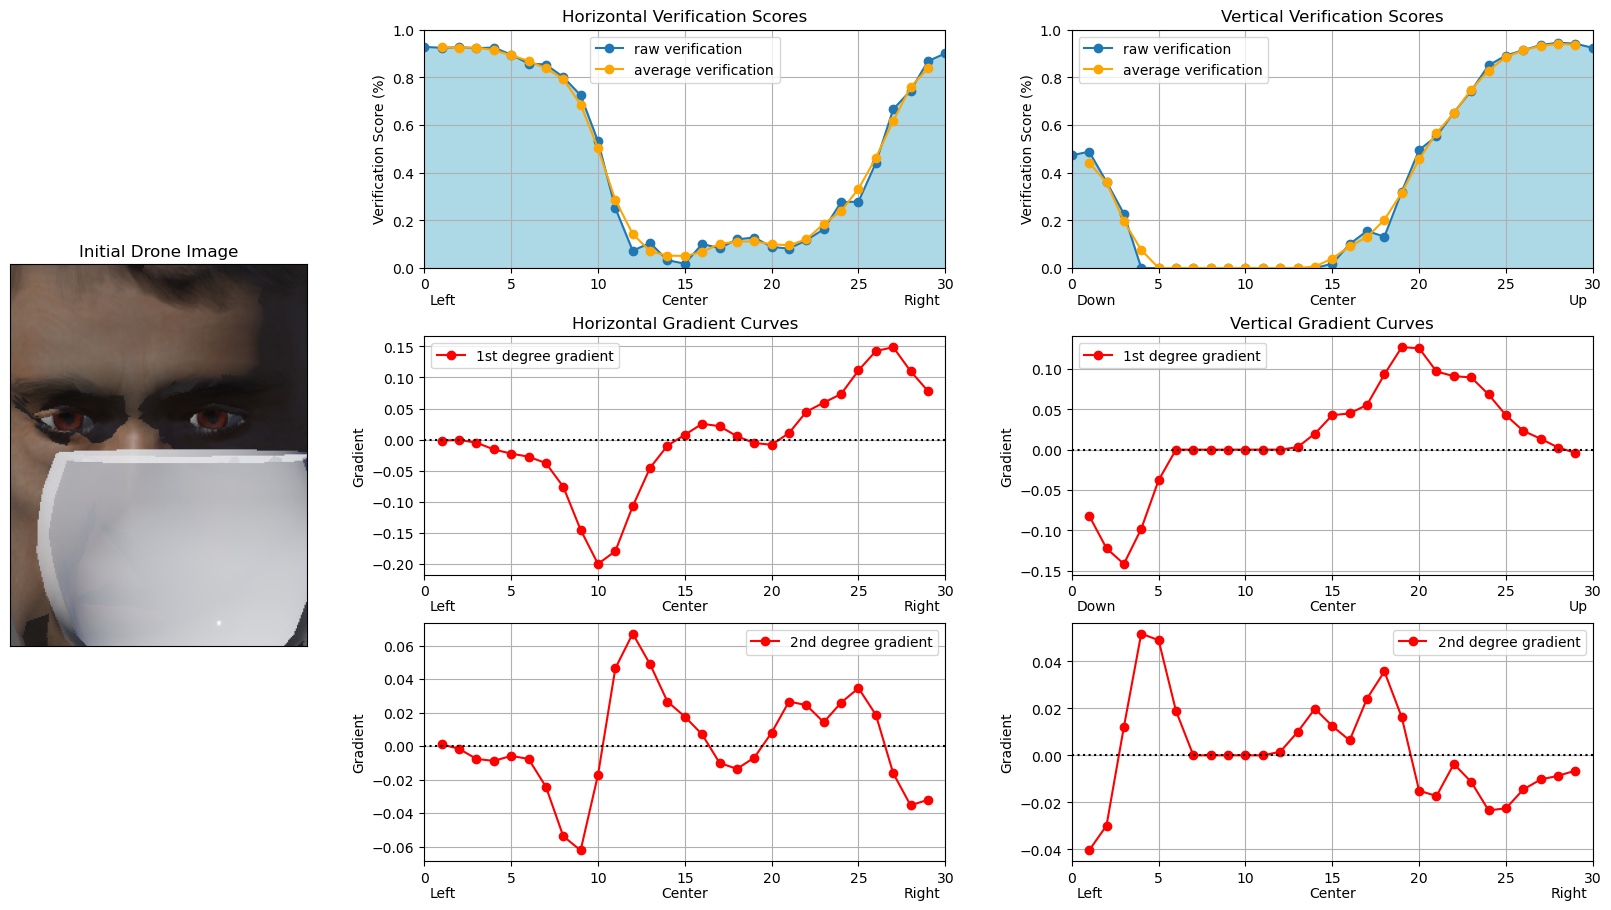

In [6]:
# 1684513196.3216143  1684513284.4159942
# 1684513373.422989   1684513460.4282734
# 1684513548.8986912  1684513635.153206
# 1684513725.26202    1684513813.5108426
# 1684513905.7001288  1684513992.394229

plot_scores_distribution('1684513196.3216143')

# Complete Dataset Analysis

In [ ]:
# Imports
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [145]:
base_dir = '/Path/To/Base/Simulation/Data/'

total_vertical_verification_scores   = []
total_vertical_1st_gradient_scores   = []
total_horizontal_verification_scores = []
total_horizontal_1st_gradient_scores = []

for sample_name in os.listdir(base_dir):

    # Build json path
    json_path  = os.path.join(base_dir, sample_name, f'{sample_name}.json')

    # Read json file
    with open(json_path, 'r') as json_file:
        data = json.load(json_file)
    
    # Construct lists
    vertical_scores   = data['left_verification_confidence'][::-1] + data['center_verification_confidence'] + data['right_verification_confidence']
    vertical_avg_scores = apply_averaging_window(vertical_scores)
    vertical_gradient_scores = np.gradient(vertical_avg_scores)

    horizontal_scores = data['down_verification_confidence'][::-1] + data['center_verification_confidence'] + data['up_verification_confidence']
    horizontal_avg_scores = apply_averaging_window(horizontal_scores)
    horizontal_gradient_scores = np.gradient(horizontal_avg_scores)

    total_vertical_verification_scores.extend(vertical_avg_scores)
    total_vertical_1st_gradient_scores.extend(vertical_gradient_scores)
    total_horizontal_verification_scores.extend(horizontal_avg_scores)
    total_horizontal_1st_gradient_scores.extend(horizontal_gradient_scores)

In [164]:
def plot_distribution_side_by_side(data1, data2, score_type):
    # Create a figure with two axes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the histograms
    ax1.hist(data1, bins=100, alpha=0.5, color='darkblue')
    ax2.hist(data2, bins=100, alpha=0.5, color='red')

    # Set the labels and titles for each histogram
    if score_type=='avg':
        ax1.set_xlabel('Verification Score')
        ax1.set_ylabel('Frequency')
        ax1.set_title('Vertical Distribution')
        ax2.set_xlabel('Verification Score')
        ax2.set_ylabel('Frequency')
        ax2.set_title('Horizontal Distribution')
    
    if score_type=='grad':
        ax1.axvline(x=0, linestyle='dotted', color='black')
        ax1.set_xlabel('Gradient')
        ax1.set_ylabel('Frequency')
        ax1.set_title('Vertical Distribution')
        ax2.axvline(x=0, linestyle='dotted', color='black')
        ax2.set_xlabel('Gradient')
        ax2.set_ylabel('Frequency')
        ax2.set_title('Horizontal Distribution')

    # Set y-axis to logarithmic scale
    ax1.set_yscale('log')
    ax2.set_yscale('log')

    # Add a legend
    # ax1.legend()
    # ax2.legend()

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

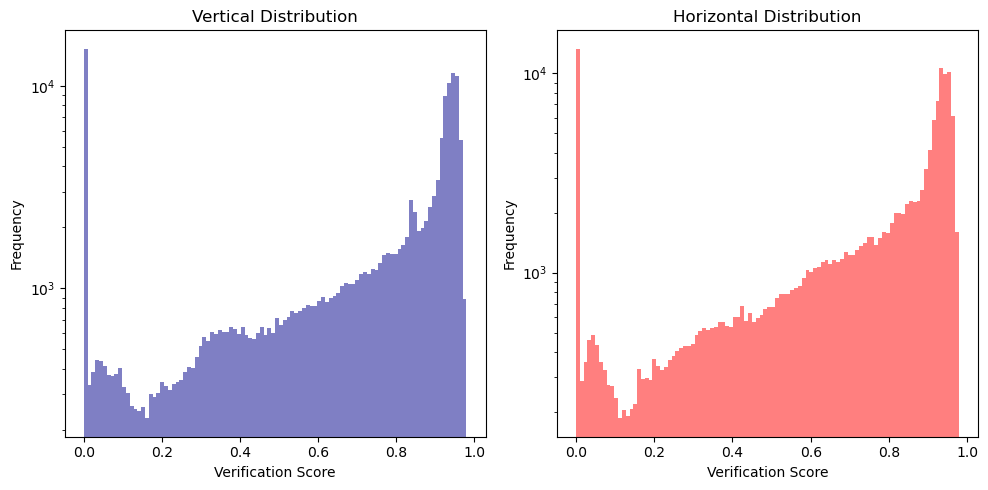

In [165]:
plot_distribution_side_by_side(total_vertical_verification_scores, total_horizontal_verification_scores, score_type='avg')

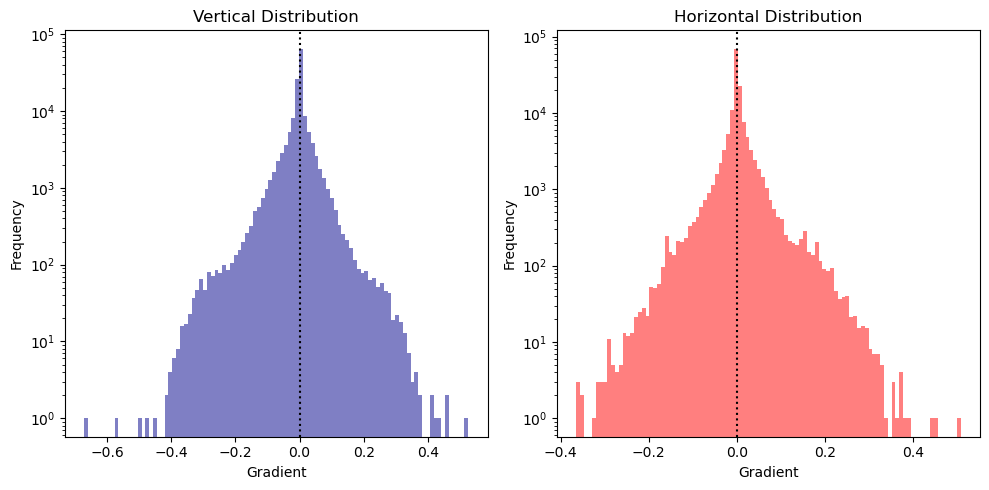

In [166]:
plot_distribution_side_by_side(total_vertical_1st_gradient_scores, total_horizontal_1st_gradient_scores, score_type='grad')